## Data Cleaning for Food Environment Project

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns # for visualizations

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define directory where data is located
data_dir =  "/content/drive/My Drive/DS 5100 Food Environment Project/FoodEnvironmentAtlas/"

# Display files located there
!ls  "/content/drive/My Drive/DS 5100 Food Environment Project/FoodEnvironmentAtlas"

ReadMeFile2020.txt	   SupplementalDataCounty.csv  VariableList.gsheet
StateAndCountyData.csv	   SupplementalDataState.csv
StateAndCountyData.gsheet  VariableList.csv


#### State and County Data

In [ ]:
# Read in state and county data
df = pd.read_csv(data_dir + 'StateAndCountyData.csv')
df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [ ]:
df.State.nunique()

101

In [ ]:
df.State.value_counts()

TX     66315
GA     41543
VA     33155
KY     31738
MO     30332
       ...  
 CT       72
 RI       45
 HI       45
 DE       27
 DC        9
Name: State, Length: 101, dtype: int64

In [ ]:
# Cleaning state to remove spaces
def clean_state_column(df):
  df['State'] = df['State'].str.strip()
  return df

df = clean_state_column(df)

In [ ]:
df.State.value_counts()

TX    68601
GA    42974
VA    34352
KY    32818
MO    31367
KS    28008
NC    27743
IL    27675
IA    26896
TN    26108
IN    24878
NE    24542
OH    24431
MN    23700
MI    23074
MS    21366
OK    21021
AR    20266
WI    20121
PA    18873
AL    18504
FL    18415
LA    17385
NY    17376
SD    17354
CO    17137
CA    16261
WV    15060
MT    14889
ND    13873
SC    12741
ID    11957
WA    10897
OR     9945
NM     9019
UT     7926
MD     6698
AK     6455
WY     6107
NJ     5874
ME     4555
NV     4460
AZ     4108
VT     3977
MA     3922
NH     2861
CT     2322
RI     1426
HI     1351
DE      878
DC      263
Name: State, dtype: int64

In [ ]:
# Look at how many counties we have
df.County.nunique()

3708

In [ ]:
df.County.value_counts()

Washington           8325
Jefferson            6904
Franklin             6847
Jackson              6351
Lincoln              6257
                     ... 
Power County            9
Mahnomen County         9
Hot Spring County       9
Morehouse Parish        9
Raleigh County          9
Name: County, Length: 3708, dtype: int64

Web Scrape State/County Lookup Table

In [ ]:
# For county name cleaning will web scrape to get lookup table
# Due to different names country vs census area didn't think we could clean easily

# Web scrape lookup table from here: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Define header
headers = {'user-agent': 'UVA Project (pkx2ec@virginia.edu) (Language=Python 3.8.2; Platform=Macintosh; Intel Mac OS X 11_5_2)'} 

# Specify URL
URL = 'https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697'

# Access HTML content 
r = requests.get(URL, headers= headers)

# Parse HTML content
soup = BeautifulSoup(r.content, 'html5lib')




In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <title>\n   County FIPS Codes | NRCS\n  </title>\n  <script type="text/javascript">\n   // Instructions: please embed this snippet directly into every page in your website template.\n    // For optimal performance, this must be embedded directly into the template, not referenced\n    // as an external file.\n\n    // Answers Cloud Services Embed Script v1.02\n    // DO NOT MODIFY BELOW THIS LINE *****************************************\n    ;(function (g) {\n        var d = document, i, am = d.createElement(\'script\'), h = d.head || d.getElementsByTagName("head")[0],\n                aex = {\n                    "src": "//gateway.answerscloud.com/nrcs-usda-gov/production/gateway.min.js",\n                    "type": "text/javascript",\n                    "async": "true",\n                    "data-vendor": "acs",\n                    

In [ ]:
# Find data of interest
table = soup.find('div', attrs = {'class':'centerColImg'}) 

In [ ]:
# Create empty dataframe to save FIPS info
fips_table = pd.DataFrame(columns = ['FIPS', 'County', 'State'])
fips_table

,FIPS,County,State


In [ ]:
# Add each FIPS code to dataframe
first_row = True
for row in table.findAll('tr'):
  # First row doesn't have the info we want so skip it
  if first_row:
    first_row = False
  else:
    row_entries = row.findAll('td')
    row_text = [i.text for i in row_entries]
    fips_table.loc[len(fips_table)] = row_text

In [ ]:
# Check first 5 rows of our FIPS table
fips_table.head()

,FIPS,County,State
0,01001,Autauga,AL
1,01003,Baldwin,AL
2,01005,Barbour,AL
3,01007,Bibb,AL
4,01009,Blount,AL


In [ ]:
df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [ ]:
df.dtypes

FIPS               int64
State             object
County            object
Variable_Code     object
Value            float64
dtype: object

In [ ]:
fips_table.dtypes

FIPS      object
County    object
State     object
dtype: object

In [ ]:
# Change type of fips table to int so we join it
fips_table['FIPS'] = fips_table['FIPS'].astype(int)

In [ ]:
fips_table.head()

,FIPS,County,State
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL


In [ ]:
original_fips = df.FIPS.unique()
new_fips = fips_table.FIPS.unique()

for i in original_fips:
  if i not in new_fips:
    fips_table.loc[len(fips_table.index)] = df.loc[df['FIPS']==i,['FIPS', 'County', 'State']].iloc[0]

In [ ]:
# Drop original state and county columns 
# Otherwise we'll have 2 columns with the same name
df.drop(['State', 'County'], axis=1, inplace = True)

In [ ]:
# Deal with the leading zero in FIPS column
# Nevermind, looks like it handled this when we converted to int

In [ ]:
# Check shape of original dataframe so we know if we drop data
df.shape

(852810, 3)

In [ ]:
df.FIPS.nunique()

3196

In [ ]:
fips_table.FIPS.nunique()

3288

In [ ]:
# Join together fips lookup table
# Left join so we don't lose any data from our original table
df_new = df.merge(fips_table, on = ['FIPS'], how = 'left')


In [ ]:
df_new.head()

,FIPS,Variable_Code,Value,County,State
0,1001,LACCESS_POP10,18428.439690,Autauga,AL
1,1001,LACCESS_POP15,17496.693040,Autauga,AL
2,1001,PCH_LACCESS_POP_10_15,-5.056026,Autauga,AL
3,1001,PCT_LACCESS_POP10,33.769657,Autauga,AL
4,1001,PCT_LACCESS_POP15,32.062255,Autauga,AL


In [ ]:
df_new.shape

(852810, 5)

In [ ]:
# Missing values for county where we didn't have match
df_new.County.isnull().sum()

0

In [ ]:
df_new[df_new['County'].isnull()]

,FIPS,Variable_Code,Value,County,State


In [ ]:
df_new.head()

,FIPS,Variable_Code,Value,County,State
0,1001,LACCESS_POP10,18428.439690,Autauga,AL
1,1001,LACCESS_POP15,17496.693040,Autauga,AL
2,1001,PCH_LACCESS_POP_10_15,-5.056026,Autauga,AL
3,1001,PCT_LACCESS_POP10,33.769657,Autauga,AL
4,1001,PCT_LACCESS_POP15,32.062255,Autauga,AL


Reformat data

In [ ]:
# Re-format so variables are across the columns not adding rows in the "Variable Code" column
pivot = pd.pivot_table(df_new, index = ['FIPS', 'State', 'County'], columns = 'Variable_Code', values = 'Value')
pivot.reset_index(inplace=True)
pivot # format looks better for analysis, but lots of NaNs...


Variable_Code,FIPS,State,County,2010_Census_Population,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,CACFP_PART_2012,CACFP_PART_2013,CACFP_PART_2014,CACFP_PART_2015,CACFP_PART_2016,CACFP_PART_2017,CACFP_PART_2018,CHILDPOVRATE15,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,CH_FOODINSEC_14_17,CH_VLFOODSEC_14_17,CONVS11,CONVS16,CONVSPTH11,CONVSPTH16,CSA07,CSA12,DIRSALES07,DIRSALES12,DIRSALES_FARMS07,DIRSALES_FARMS12,FARM_TO_SCHOOL13,FARM_TO_SCHOOL15,FDPIR12,FDPIR15,...,SNAP_PART_RATE11,SNAP_PART_RATE16,SNAP_REPORTSIMPLE09,SNAP_REPORTSIMPLE16,SODATAX_STORES14,SODATAX_VENDM14,SPECS11,SPECS16,SPECSPTH11,SPECSPTH16,SUPERC11,SUPERC16,SUPERCPTH11,SUPERCPTH16,State_Population_2012,State_Population_2013,State_Population_2014,State_Population_2015,State_Population_2016,State_Population_2017,State_Population_2018,VEG_ACRES07,VEG_ACRES12,VEG_ACRESPTH07,VEG_ACRESPTH12,VEG_FARMS07,VEG_FARMS12,VLFOODSEC_12_14,VLFOODSEC_15_17,WICS11,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
0,1,AL,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42903.75,41862.50,45038.75,51263.75,59447.50,61361.50,65638.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.418998e+05,1.390005e+05,1.310462e+05,1.321328e+05,1.291599e+05,1.239926e+05,1.206048e+05
1,2,AK,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10540.75,10962.75,11429.50,10786.50,10039.00,10082.50,9547.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.496933e+04,2.305467e+04,1.960467e+04,1.968200e+04,1.912092e+04,1.818817e+04,1.709242e+04
2,4,AZ,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41670.75,42945.25,40344.00,42551.50,42618.00,42284.75,49678.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.932141e+05,1.825008e+05,1.730202e+05,1.670722e+05,1.639978e+05,1.535101e+05,1.495133e+05
3,5,AR,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55787.00,67629.75,76841.25,67984.50,66903.00,63450.25,57042.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.429275e+04,8.977683e+04,8.328858e+04,8.421958e+04,8.055467e+04,7.651850e+04,7.360675e+04
4,6,CA,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362931.00,451422.00,511862.75,562667.00,595088.25,617881.75,624624.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.472468e+06,1.431881e+06,1.348939e+06,1.265005e+06,1.174875e+06,1.080241e+06,1.009492e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,56037,WY,Sweetwater,43806.0,1.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,0.0,4.0,-0.8,-0.2,28.0,22.0,0.636176,0.497231,0.0,0.0,158.0,94.0,15.0,22.0,0.0,0.0,0.0,

In [ ]:
# Look at missing data
percent_missing = pivot.isnull().sum() * 100 / len(pivot)
percent_missing
# Looks to be a high percentage of missing data in some columns
# From inspection though looks like some are due to "Total" county (98.40% missing)
# I.e. state-wide variables so they are null for each county
# Definitely some data cleaning to be done

Variable_Code
2010_Census_Population     1.689612
AGRITRSM_OPS07             3.629537
AGRITRSM_OPS12             3.629537
AGRITRSM_RCT07            38.235294
AGRITRSM_RCT12            33.698373
                            ...    
WIC_PART_2014             98.404255
WIC_PART_2015             98.404255
WIC_PART_2016             98.404255
WIC_PART_2017             98.404255
WIC_PART_2018             98.404255
Length: 332, dtype: float64

Split state and county data into separate tables

In [ ]:
df_state = pivot[pivot.FIPS < 60] # (FIPS 1-56 are state-level)

In [ ]:
df_county = pivot[pivot.FIPS >= 60]

In [ ]:
# Look at missing data for county
percent_missing = df_county.isnull().sum() * 100 / len(df_county)
percent_missing # some with 100% missing must have been those state total rows

Variable_Code
FIPS                        0.000000
State                       0.000000
County                      0.000000
2010_Census_Population      0.095390
AGRITRSM_OPS07              2.066773
                             ...    
WIC_PART_2014             100.000000
WIC_PART_2015             100.000000
WIC_PART_2016             100.000000
WIC_PART_2017             100.000000
WIC_PART_2018             100.000000
Length: 335, dtype: float64

In [ ]:
# Drop columns where we have all nas 
df_state = df_state.dropna(axis=1, how='all')
df_county = df_county.dropna(axis=1, how='all')

In [ ]:
df_county.isnull().sum()

Variable_Code
FIPS                        0
State                       0
County                      0
2010_Census_Population      3
AGRITRSM_OPS07             65
                         ... 
VLFOODSEC_15_17             2
WICS11                    134
WICS16                    160
WICSPTH11                 137
WICSPTH16                 163
Length: 293, dtype: int64

Save cleaned data back to google drive


In [ ]:
# Define directory where to save cleaned data
data_dest =  "/content/drive/My Drive/DS 5100 Food Environment Project/Data_Cleaned/"

df_state.to_csv(data_dest + 'State_Level_Data.csv', index=False)
df_county.to_csv(data_dest + 'County_Level_Data.csv', index=False)

Preliminary exploration....

In [ ]:
# Just picking a few columns to look at for now to get an idea....
cols = ['PCT_LACCESS_HHNV15', 'GROCPTH16', 'FFRPTH16', 'PCT_SNAP17', 
        'FOODINSEC_15_17', 'PCT_OBESE_ADULTS17', 'POVRATE15']
pivot_subset = pivot[cols]
# Column descriptions
# 'PCT_LACCESS_HHNV15': Households, no car & low access to store (%), 2015
# 'GROCPTH16': Grocery stores/1,000 pop, 2016
# 'FFRPTH16': Fast-food restaurants/1,000 pop, 2016
# 'PCT_SNAP17': SNAP participants (% pop), 2017*
# 'FOODINSEC_15_17': Household food insecurity (%, three-year average), 2015-17*
# 'PCT_OBESE_ADULTS17': Adult obesity rate, 2017*
# 'POVRATE15': Poverty rate, 2015

In [ ]:
# Check correlations
pivot_subset.corr()

Variable_Code,PCT_LACCESS_HHNV15,GROCPTH16,FFRPTH16,PCT_SNAP17,FOODINSEC_15_17,PCT_OBESE_ADULTS17,POVRATE15
Variable_Code,,,,,,,
PCT_LACCESS_HHNV15,1.000000,0.120120,-0.205692,0.191959,0.039258,0.184312,0.452562
GROCPTH16,0.120120,1.000000,-0.066858,-0.203945,-0.071407,-0.131417,-0.060947
FFRPTH16,-0.205692,-0.066858,1.000000,-0.000191,-0.041139,-0.094371,-0.062722
PCT_SNAP17,0.191959,-0.203945,-0.000191,1.000000,0.318627,0.414217,0.432630
FOODINSEC_15_17,0.039258,-0.071407,-0.041139,0.318627,1.000000,0.403766,0.166379
PCT_OBESE_ADULTS17,0.184312,-0.131417,-0.094371,0.414217,0.403766,1.000000,0.221266
POVRATE15,0.452562,-0.060947,-0.062722,0.432630,0.166379,0.221266,1.000000


Some simple visualizations

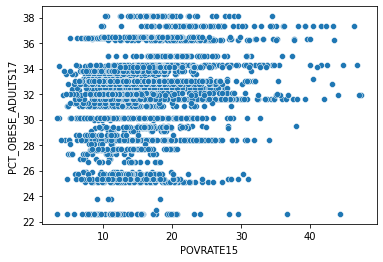

In [ ]:
# Poverty rate vs adult obesity rate
sns.scatterplot(x='POVRATE15', y='PCT_OBESE_ADULTS17',  data=pivot_subset)

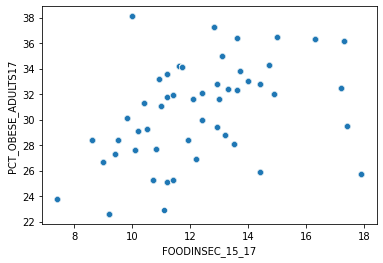

In [ ]:
# Food insecurity vs adult obesity rate
sns.scatterplot(x='FOODINSEC_15_17', y='PCT_OBESE_ADULTS17',  data=pivot_subset)

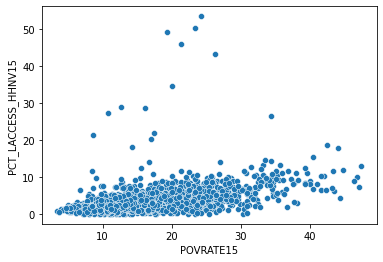

In [ ]:
# Poverty rate vs low access to store
sns.scatterplot(x='POVRATE15', y='PCT_LACCESS_HHNV15',  data=pivot_subset)

In [1]:
# Test Git